In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings("ignore")

In [25]:
Movies = pd.read_csv('my_movies.csv')
Movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [26]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [27]:
#Let's remove 1st 5 columns as data type is object:
movie = Movies.iloc[:,5:15]
movie

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [28]:
movie.describe().T

,count,mean,std,min,25%,50%,75%,max
Sixth Sense,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
Gladiator,10.0,0.7,0.483046,0.0,0.25,1.0,1.0,1.0
LOTR1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Patriot,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
LOTR2,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter2,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
LOTR,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Braveheart,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Green Mile,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0


## Aprori Algorithm:

In [66]:
frequent_itemsets = apriori(movie, min_support = 0.15,use_colnames=True,verbose=1)

Processing 27 combinations | Sampling itemset size 3


In [67]:
print(len(frequent_itemsets))

13


In [68]:
print(frequent_itemsets.head())

   support         itemsets
0      0.6    (Sixth Sense)
1      0.7      (Gladiator)
2      0.2          (LOTR1)
3      0.2  (Harry Potter1)
4      0.6        (Patriot)


In [69]:
print(frequent_itemsets.sort_values('support',ascending=False).head())

    support                  itemsets
1       0.7               (Gladiator)
0       0.6             (Sixth Sense)
4       0.6                 (Patriot)
10      0.6      (Gladiator, Patriot)
7       0.5  (Gladiator, Sixth Sense)


In [72]:
rules = association_rules(frequent_itemsets, metric= "confidence", min_threshold=0.3)
print(rules.head(10))
rules.shape

     antecedents    consequents  antecedent support  consequent support  \
0    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
1  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
2      (Patriot)  (Sixth Sense)                 0.6                 0.6   
3  (Sixth Sense)      (Patriot)                 0.6                 0.6   
4   (Green Mile)  (Sixth Sense)                 0.2                 0.6   
5  (Sixth Sense)   (Green Mile)                 0.6                 0.2   
6    (Gladiator)      (Patriot)                 0.7                 0.6   
7      (Patriot)    (Gladiator)                 0.6                 0.7   
8        (LOTR2)        (LOTR1)                 0.2                 0.2   
9        (LOTR1)        (LOTR2)                 0.2                 0.2   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0      0.5    0.714286  1.190476      0.08         1.4       0.533333  
1      0.5    0.833333  1.1904

(16, 10)

In [73]:
rules = association_rules(frequent_itemsets, metric= "confidence", min_threshold=0.8)
print(rules.head(10))
rules.shape

                antecedents    consequents  antecedent support  \
0             (Sixth Sense)    (Gladiator)                 0.6   
1              (Green Mile)  (Sixth Sense)                 0.2   
2               (Gladiator)      (Patriot)                 0.7   
3                 (Patriot)    (Gladiator)                 0.6   
4                   (LOTR2)        (LOTR1)                 0.2   
5                   (LOTR1)        (LOTR2)                 0.2   
6  (Gladiator, Sixth Sense)      (Patriot)                 0.5   
7    (Patriot, Sixth Sense)    (Gladiator)                 0.4   

   consequent support  support  confidence      lift  leverage  conviction  \
0                 0.7      0.5    0.833333  1.190476      0.08         1.8   
1                 0.6      0.2    1.000000  1.666667      0.08         inf   
2                 0.6      0.6    0.857143  1.428571      0.18         2.8   
3                 0.7      0.6    1.000000  1.428571      0.18         inf   
4              

(8, 10)

In [74]:
rules = association_rules(frequent_itemsets, metric= "confidence", min_threshold=0.4)
print(rules.head())
rules.shape

     antecedents    consequents  antecedent support  consequent support  \
0    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
1  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
2      (Patriot)  (Sixth Sense)                 0.6                 0.6   
3  (Sixth Sense)      (Patriot)                 0.6                 0.6   
4   (Green Mile)  (Sixth Sense)                 0.2                 0.6   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0      0.5    0.714286  1.190476      0.08         1.4       0.533333  
1      0.5    0.833333  1.190476      0.08         1.8       0.400000  
2      0.4    0.666667  1.111111      0.04         1.2       0.250000  
3      0.4    0.666667  1.111111      0.04         1.2       0.250000  
4      0.2    1.000000  1.666667      0.08         inf       0.500000  


(15, 10)

In [76]:
rules[rules.support>0.2].sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
11,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
9,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
10,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
13,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


In [77]:
rules[(rules.support>0.2)&(rules.confidence>0.4)].sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
11,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
9,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
10,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
13,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


In [78]:
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_,consequents_
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333,Gladiator,Sixth Sense
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000,Sixth Sense,Gladiator
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000,Patriot,Sixth Sense
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000,Sixth Sense,Patriot
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000,Green Mile,Sixth Sense
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000,Gladiator,Patriot
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000,Patriot,Gladiator
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000,LOTR2,LOTR1
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000,LOTR1,LOTR2
9,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000,"Gladiator,Sixth Sense",Patriot


In [79]:
pivot = rules.pivot(index='antecedents_',columns='consequents_',values='confidence')
pivot

consequents_,Gladiator,"Gladiator,Patriot","Gladiator,Sixth Sense",LOTR1,LOTR2,Patriot,"Patriot,Sixth Sense",Sixth Sense
antecedents_,,,,,,,,
Gladiator,NaN,NaN,NaN,NaN,NaN,0.857143,0.571429,0.714286
"Gladiator,Patriot",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
"Gladiator,Sixth Sense",NaN,NaN,NaN,NaN,NaN,0.800000,NaN,NaN
Green Mile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
LOTR1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
LOTR2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Patriot,1.000000,NaN,0.666667,NaN,NaN,NaN,NaN,0.666667
"Patriot,Sixth Sense",1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sixth Sense,0.833333,0.666667,NaN,NaN,NaN,0.666667,NaN,NaN


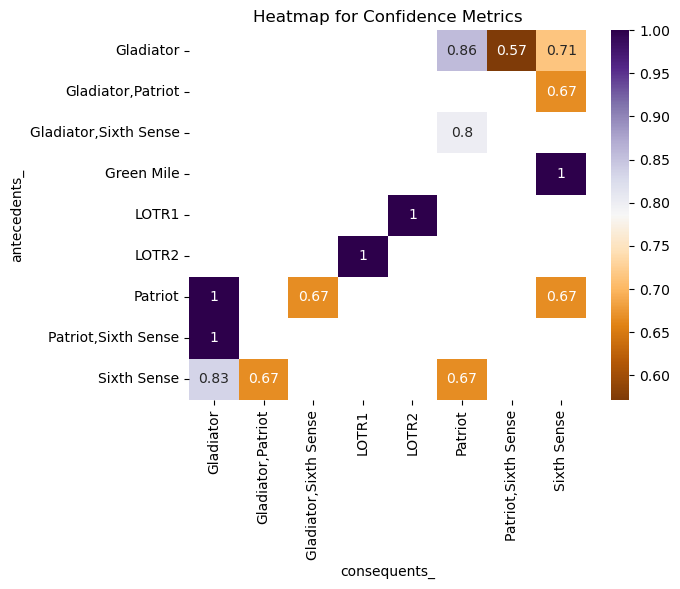

In [80]:
sns.heatmap(pivot,cmap='PuOr',annot=True)
plt.title('Heatmap for Confidence Metrics')
plt.show()

In [81]:
# metric= "lift" :

In [82]:
rules = association_rules(frequent_itemsets, metric= "lift", min_threshold=0.6)
print(rules.head())
rules.shape

     antecedents    consequents  antecedent support  consequent support  \
0    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
1  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
2      (Patriot)  (Sixth Sense)                 0.6                 0.6   
3  (Sixth Sense)      (Patriot)                 0.6                 0.6   
4   (Green Mile)  (Sixth Sense)                 0.2                 0.6   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0      0.5    0.714286  1.190476      0.08         1.4       0.533333  
1      0.5    0.833333  1.190476      0.08         1.8       0.400000  
2      0.4    0.666667  1.111111      0.04         1.2       0.250000  
3      0.4    0.666667  1.111111      0.04         1.2       0.250000  
4      0.2    1.000000  1.666667      0.08         inf       0.500000  


(16, 10)

In [83]:
rules = association_rules(frequent_itemsets, metric= "lift", min_threshold=0.9)
print(rules.head())
rules.shape

     antecedents    consequents  antecedent support  consequent support  \
0    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
1  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
2      (Patriot)  (Sixth Sense)                 0.6                 0.6   
3  (Sixth Sense)      (Patriot)                 0.6                 0.6   
4   (Green Mile)  (Sixth Sense)                 0.2                 0.6   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0      0.5    0.714286  1.190476      0.08         1.4       0.533333  
1      0.5    0.833333  1.190476      0.08         1.8       0.400000  
2      0.4    0.666667  1.111111      0.04         1.2       0.250000  
3      0.4    0.666667  1.111111      0.04         1.2       0.250000  
4      0.2    1.000000  1.666667      0.08         inf       0.500000  


(16, 10)

In [84]:
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_,consequents_
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333,Gladiator,Sixth Sense
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000,Sixth Sense,Gladiator
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000,Patriot,Sixth Sense
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000,Sixth Sense,Patriot
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000,Green Mile,Sixth Sense
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000,Sixth Sense,Green Mile
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000,Gladiator,Patriot
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000,Patriot,Gladiator
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000,LOTR2,LOTR1
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000,LOTR1,LOTR2


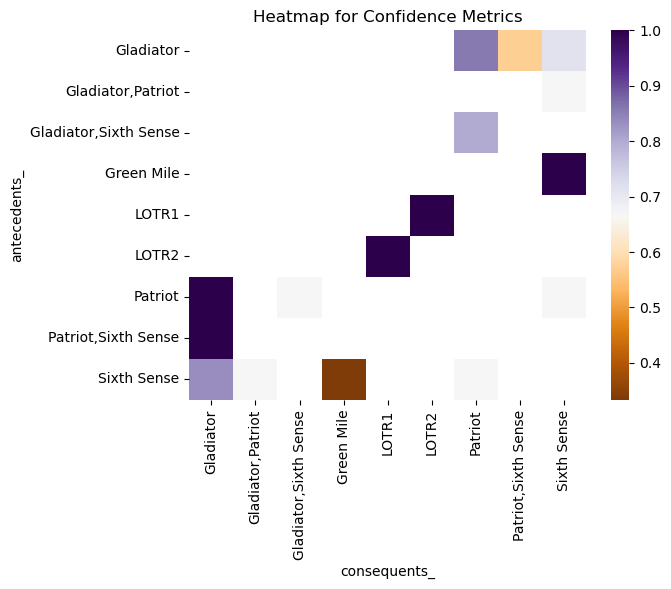

In [85]:
pivot = rules.pivot(index='antecedents_',columns='consequents_',values='confidence')
sns.heatmap(pivot,cmap='PuOr')
plt.title('Heatmap for Confidence Metrics')
plt.show()